# 모델의 결과 출력

앞서 모델을 훈련하는 방법과 예측에 사용하는 방법을 배웠습니다. 이는 모든 데이터 과학 프로젝트에서 필수적이지만, 단순히 모델을 훈련하고 예측에 활용하는 것만으로는 충분하지 않습니다. 이는 모델이 학습되었음에도 성능을 평가하지 않았기 때문입니다.

모델을 훈련하는 데 사용하지 않은 데이터를 이용하여 모델을 평가해야 합니다. 이는 모델이 훈련된 데이터에 대해서는 예측을 잘 수행할 수 있지만, 훈련에 사용하지 않은 데이터를 모델에 사용하였을 때 성능이 좋지 않으면 사용할 수 없기 때문입니다. 따라서 이 노트북에서는 이러한 일이 발생하지 않도록 하는 방법을 배웁니다. 그렇게 하기 전에 먼저 모델이 훈련 후에 훈련되지 않은 데이터로 인해 성능이 저하되는 원인을 먼저 이해해야 합니다. 이것은 과소적합(underfitting) 또는 과대적합(overfitting) 때문일 수 있습니다.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree

## 1. 과소적합 vs 과대적합

과소적합은 모델이 너무 단순화되어 데이터를 제대로 설명할 수 없음을 의미합니다. 예를 들어, 비선형 관계가 있는 데이터가 있지만 선형 모델을 사용하여 학습하는 경우 과소적합이 발생할 수 있습니다. 이는 선형 모델이 데이터에서 관찰되는 비선형 관계나 추세를 설명할 수 없기 때문입니다. 따라서 과소적합된 모델을 사용하여 예측하면 성능이 저하됩니다.

반면에 과대적합은 모델이 너무 잘 적합되어 데이터 세트 내의 모든 노이즈 또는 이상값도 학습했다는 것을 의미합니다. 따라서 훈련된 데이터에 대해 테스트하면 성능이 매우 우수합니다. 그러나 너무 잘 훈련되었기 때문에 일반화할 수 없으며 훈련되지 않은 데이터에 대해 테스트할 때는 성능이 좋지 않습니다.

이 [문서](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76) 와 이 [문서 ](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) 에서 과소적합 및 과대적합에 대한 자세한 내용을 확인하고, 흥미로운 내용을 기록하십시오. 기사 내에 수학 방정식이 있을 수 있지만 방정식을 이해할 필요는 없습니다. 기본 개념을 이해하는 것이 더 중요합니다. 
- 편향과 분산의 차이점은 무엇입니까? 
- 과소적합을 방지하는 방법은 무엇입니까? 
- 과대적합을 방지하는 방법은 무엇입니까?

<font color=pink>편향과 분산의 차이점:
편향(Bias)은 모델이 주어진 데이터에 대해 예측을 얼마나 잘 못하는지에 대한 척도야. 예를 들어, 학습된 모델이 실제 값에서 멀리 떨어진 값을 예측하는 경우 높은 편향이 있을 수 있어.
분산(Variance)은 모델이 같은 데이터에 대해 얼마나 민감한지를 나타내는 거야. 높은 분산은 훈련 데이터에 대해 과도하게 학습되어 새로운 데이터에는 잘 일반화되지 않을 수 있어.

과소적합을 방지하는 방법:
모델의 복잡성을 높여야 해. 예를 들어, 모델에 더 많은 층이나 파라미터를 추가하거나, 더 복잡한 알고리즘을 사용해야 해. 또한, 더 많은 학습 데이터를 사용하는 것도 도움이 돼.

과대적합을 방지하는 방법: 더 많은 학습 데이터를 사용하거나, 모델의 복잡성을 줄여야 해. 예를 들어, 모델의 파라미터 수를 줄이거나, 정규화 기법을 사용하여 모델의 복잡성을 제한할 수 있어. 또한, 교차 검증을 통해 모델의 성능을 평가하고, 적절한 정규화 기법을 선택하는 것도 중요해.<font/>

아래 그래프를 보십시오. 빨간색 선이 모델이고 파란색 점이 데이터 세트인 경우 모델이 과소적합인가요? 과대적합인가요?

<img src = './resources/model1.jpg'>

답변 : 과소적합

<img src = './resources/model2.jpg'>

답변 : 과대적합

## 2. 과소적합과 과대적합의 균형 맞추기

위에서 보면 과소적합 및 과대적합 사이의 균형을 찾는 것이 중요하다는 것을 알 수 있습니다. 이를 통해 모델은 정확하면서도 훈련되지 않은 데이터에 대해서도 예측을 잘 수행할 수 있도록 일반화할 수 있습니다. 이는 모델이 다소 복잡하지만 너무 복잡하지 않아야 함을 의미합니다. 따라서 균형을 이루기 위해 노력할 수 있는 몇 가지 방법이 있습니다. 우리는 이전에 탐색한 다양한 기계 학습 기술에 대해 이러한 방법 중 일부를 시도할 것입니다.

## 2.1 k-최근접 이웃(K-Nearest Neighbor) 알고리즘

이전 노트북에서 KNN(K-Nearest Neighbor) 알고리즘을 적용하여 데이터를 분류하는 방법을 배웠습니다. KNN은 문제의 지점에 가장 가까운 대부분의 다른 지점을 기반으로 데이터 지점을 분류합니다. 그러나 알고리즘을 사용하기 위해서는 이웃의 수를 매개변수로 입력해야 합니다. 과소적합과 과대적합의 경우 이웃의 수가 중요한 역할을 합니다. 이는 이웃의 수가 모델이 과대, 과소적합될 가능성을 결정하기 때문입니다. 이웃 수가 많을수록 모델이 과소적합될 가능성이 줄어듭니다. 이웃 수가 너무 많으면 모델이 과대적합될 가능성이 높습니다. 따라서 모델이 상대적으로 균형을 이룰 수 있도록 적합한 이웃의 수가 있어야 합니다. 이 숫자는 데이터 세트에 따라 달라질 수 있습니다. 이제 앞서 살펴보았던 Iris Flower 데이터 세트에 대해 이웃의 숫자를 찾아봅시다.

먼저 Iris.data에서 데이터 프레임 df로 Iris Flower 데이터 세트를 읽어야 합니다. 데이터 프레임에 열 이름이 있는지 확인하고 데이터 세트에 대한 표준 검사도 수행해야 합니다(예: 오류 데이터 및 이상값 확인). 아래 그림(출처: https://www.researchgate.net/Figure/Trollius-ranunculoide-flower-with-measured-traits_fig6_272514310) 을 참고하여 변수를 이해할 수 있습니다.

<img src = "./resources/PetalSepal1.png">

In [3]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', "iris.data")
df= pd.read_csv('iris.data', header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = names

print(df.head())
df.describe()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


이제 기계학습 알고리즘이 처리할 데이터를 준비하는 데 필요한 단계를 수행합니다. 먼저 특성을 x_values로 추출하고 대상 변수를 y_values로 추출합니다. 이 경우 x_values는 "sepal_length", "sepal_width", "petal_length" 및 "petal_width"가 되는 반면 y_values는 클래스가 됩니다. 또한 y_values에 레이블을 지정해야 합니다. "Setosa"는 0, "Versicolor"는 1, "Virginica"는 2로 지정할 수 있습니다. 이전 노트북을 참조하여 필요한 코드를 확인해 보세요.

In [4]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

# 각 클래스의 데이터 포인트 수 출력
print(df['class'].value_counts())

# 각기 다른 클래스에 대하여 다른 숫자를 지정한 딕셔너리
# 원-핫 인코딩으로 4개 열이 아닌 3개 열만 생성되도록 0부터 시작하는 값을 사용합니다.
label_encode = {"class": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}

# .replace를 사용하여 다른 클래스를 숫자로 변경
df.replace(label_encode,inplace=True)

# 각 클래스의 데이터 포인트 수를 출력하여 클래스가 숫자로 변경되었는지 확인
print(df['class'].value_counts())

# 클래스를 y_values로 추출
y_values = df['class']

print(y_values)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64
0    50
1    50
2    50
Name: class, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [5]:
# X와 y 값 설정
X = df.drop("class", axis=1)  # 특성 데이터
y = df["class"]  # 타겟 데이터

기계 학습 기술로 데이터를 처리할 준비가 되었음을 확인하였다면, 과대적합과 과소적합 문제의 균형을 맞추는 방법에 초점을 맞춰야 합니다.

이 균형을 결정하려면 모델이 훈련되지 않은 데이터에 적용되는 경우 모델의 성능이나 정확성을 평가할 수 있어야 합니다. 미래 데이터가 아직 생성되지 않았기 때문에 현재 데이터를 사용하여 이 평가를 수행할 수 있어야 합니다. 따라서 현재 데이터 세트는 일반적으로 2개의 다른 그룹으로 나누어 사용합니다. 한 그룹에는 데이터를 훈련하는 데 사용할 모든 훈련 데이터가 포함됩니다. 다른 그룹에는 모델 학습 단계에서 사용하지 않는 테스트 데이터가 포함됩니다. 테스트 데이터는 모델을 평가하는 데 사용되는 모델 학습 이후의 "미래" 데이터로 사용됩니다.

데이터를 2개의 그룹으로 분할하기 위해 sklearn.model_selection의 train_test_split 함수를 사용합니다. train_test_split 함수를 가져오려면 아래 코드를 실행하십시오.

In [6]:
from sklearn.model_selection import train_test_split

train_test_split 함수를 사용하여 데이터를 훈련 그룹과 테스트 그룹으로 나눕니다. 테스트 그룹은 일반적으로 데이터 세트의 20%에서 30%를 포함합니다. Iris Flower 데이터에 대하여 훈련 그룹 75%와 테스트 그룹 25% 기준으로 데이터를 분할할 수 있습니다. train_test_split 함수를 사용하는 방법을 이해하려면 이 [문서](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) 를 참고하세요. 학습 및 테스트 데이터를 보유하기 위해 x_train, y_train, x_test 및 y_test라는 변수를 생성할 수 있습니다. 또한 random_state를 추가하여 코드를 실행할 때마다 데이터가 항상 같은 방식으로 분할되도록 할 수도 있습니다.

In [7]:
# 데이터를 트레이닝 셋과 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 출력하여 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


데이터를 분할한 후 이제 데이터를 표준화하거나 정규화해야 합니다. 기계 학습에 사용하는 데이터 세트를 표준화하거나 정규화하는 것은 항상 좋은 습관입니다. 이렇게 하면 모든 변수 또는 특성의 값을 유사한 범위로 확장하는 데 도움이 됩니다. 데이터를 분할한 후에는 항상 표준화 또는 정규화를 수행해야 합니다. 이는 테스트 데이터 세트가 항상 모델에 노출되지 않고, 훈련 데이터의 정규화 또는 표준화 프로세스에 사용되지 않도록 하기 위한 것입니다.

이 경우 sklearn.preprocessing의 StandardScaler를 사용하여 데이터를 표준화하도록 선택합니다. .fit_transform 메서드를 x_train 데이터 값에 적용하지만 x_test 데이터에는 .transform 메서드만 적용 합니다. 아래 셀에서 표준화 프로세스를 구현합니다. 표준화 후 훈련 데이터에 대해 x_train_scale이라는 변수를 생성하고, 표준화 후 테스트 데이터에 대해 x_test scale이라는 또 다른 변수를 생성합니다.

In [8]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 대해 표준화 적용
x_train_scale = scaler.fit_transform(X_train)

# 테스트 데이터에 대해 훈련 데이터의 통계치를 사용하여 표준화 적용
x_test_scale = scaler.transform(X_test)

# 출력하여 확인
print("x_train_scale:")
print(x_train_scale)
print("x_test_scale:")
print(x_test_scale)

x_train_scale:
[[ 2.2256217  -1.08137229  1.78258025  1.44265925]
 [ 1.26827314  0.05691433  0.77481755  1.44265925]
 [-1.00542968  0.73988631 -1.18472103 -1.02120823]
 [-1.00542968  0.96754363 -1.18472103 -0.76185376]
 [-0.76609254 -0.85371497  0.10297575  0.27556413]
 [-1.60377252 -1.76434427 -1.35268148 -1.15088547]
 [ 0.55026173  0.51222898  0.55087029  0.5349186 ]
 [-0.76609254  2.33348758 -1.24070785 -1.41023994]
 [ 1.26827314  0.05691433  0.66284392  0.40524136]
 [ 0.07158745  0.28457166  0.6068571   0.79427307]
 [-0.28741826 -0.62605764  0.66284392  1.05362754]
 [ 1.028936    0.51222898  1.11073845  1.70201372]
 [ 0.43059316 -1.99200159  0.43889665  0.40524136]
 [ 1.62727885  1.19520095  1.33468572  1.70201372]
 [-0.40708683 -1.53668694 -0.00899788 -0.24314482]
 [ 0.19125602 -0.39840032  0.43889665  0.40524136]
 [ 0.6699303   0.28457166  0.43889665  0.40524136]
 [-0.04808112  2.10583025 -1.4086683  -1.28056271]
 [-0.64642397  1.42285828 -1.24070785 -1.28056271]
 [ 0.31092459 -0

데이터를 표준화한 후 이제 KNN 알고리즘에 대한 최적의 이웃 수를 찾는 방법을 구현할 수 있습니다. 이를 위해 서로 다른 수의 이웃으로 KNN 알고리즘을 훈련하고 테스트 데이터와 비교하여 평가합니다. 그렇게 함으로써, 우리는 다른 수의 이웃에 대한 KNN 모델의 정확도를 얻을 수 있을 것입니다. 그런 다음 가장 높은 정확도에 해당하는 이웃의 수를 찾을 수 있습니다. 그 수가 최적의 이웃 수가 됩니다. 아래 코드를 실행해보세요!

In [9]:
# 각 KNN 모델에 대한 정확도와 이웃 수를 저장하기 위해 빈 목록을 만듭니다.
accuracy = []
num_neigh = []

# ii를 사용하여 값 1에서 15까지 반복합니다. 이것은 KNN 분류기의 이웃 수가 됩니다.
for ii in range(1,16):
    # 이웃 수를 ii로 설정
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # 데이터로 모델 훈련 또는 피팅
    KNN.fit(x_train_scale,y_train)
    # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공합니다. 정확도를 목록에 저장합니다.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # 목록에 이웃 수 추가
    num_neigh.append(ii)

print(accuracy)

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0]


최적의 이웃 수를 결정하는 데 도움이 되도록 그래프에 정확도 값을 표시해 보겠습니다. 아래 코드를 실행해보세요! 
matplotlib.pyplot을 plt로 가져와야 합니다.

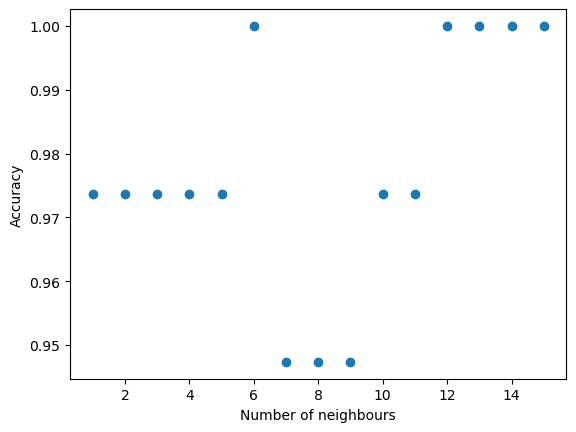

In [10]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

위의 그래프에서 사용할 최적의 이웃 수는 몇입니까? 그렇게 생각하는 이유를 설명해 보세요.

#your answer here

## 2.2 결정 트리(decision tree)

의사 결정 트리가 과소적합되거나 과대적합될 수도 있습니다.

예를 들어, 트리에 1개의 결정 지점만 있는 경우 트리가 과소적합될 가능성이 있습니다. 반대로 트리에 여러 결정 지점이 있는 경우 트리가 과대적합될 수 있습니다. 따라서 트리가 깊을수록 트리가 과대적합될 가능성이 높아집니다. 과대적합 및 과소적합에 대한 이해를 바탕으로 데이터를 과대적합하거나 과소적합할 가능성이 있는 트리(아래 참조)를 찾아서 답변해 주세요.

<img src = "./resources/dt1.jpg">

#your answer here

<img src = './resources/dt2.jpg'>

#your answer here

또한 과대적합 또는 과소적합을 제어하는 또 다른 방법은 분할을 수행하기 전에 결정 지점에 있는 최소 샘플 수를 기반으로 결정하는 것입니다. 예를 들어 트리에 날씨에 기반한 결정 지점이 있고 맑은 날이나 비오는 날로 구성된 50개의 다른 지점이 있는 경우 표본이나 데이터 지점이 꽤 많기 때문에 해당 결정 지점에서 데이터를 분할해야 합니다. 그러나 해당 날씨 결정 지점에 2개의 데이터 포인트만 있는 경우 과대적합으로 이어질 수 있으므로 날씨에 따라 데이터 포인트를 분할할 필요가 없을 수 있습니다. 따라서 결정 지점에서 표본 수를 사용하여 적합성을 제어할 수도 있습니다.

이 [문서](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3) 를 참고하여 의사결정 트리에서 과대적합 및 과소적합을 제어하는 방법에 대해 자세히 알아볼 수 있습니다. iris flower 데이터 셋트를 이용한 의사 결정 트리에서 적합성을 제어하는 데 사용할 수 있는 다른 변수는 무엇입니까?

#your answer here

의사 결정 트리가 Iris Flower 데이터 세트에 잘 맞도록 하는 최적의 매개변수 세트를 찾아보겠습니다. 위에서 사용한 분할 데이터 세트를 그대로 사용하여 아래의 코드를 실행해 보세요! 트리의 적합도를 제어하기 위해 사용하는 변수는 max_depth라고 알려져 있습니다. 이것은 트리의 최대 깊이를 나타냅니다. 트리가 깊을수록 과대적합될 가능성이 높아집니다. sklearn에서 트리를 가져올 수 있습니다.

In [11]:
# 각 의사 결정 트리에 대해 정확도와 가장 잘 테스트된 매개변수를 저장할 빈 목록을 만듭니다.
accuracy = []
depth = []

# ii를 사용하여 값 1에서 9까지 반복합니다. 이것은 의사결정 트리의 max_depth 값이 됩니다.
for ii in range(1,10):
    # max_depth를 ii로 설정
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    # 데이터로 모델 훈련 또는 피팅
    dt.fit(x_train_scale,y_train)
    # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공합니다. 정확도를 목록에 저장합니다.
    accuracy.append(dt.score(x_test_scale,y_test))
    # 목록에 max_depth 값 추가
    depth.append(ii)

print(accuracy)

[0.6052631578947368, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


그래프의 max_depth 값에 대해 정확도 값을 표시할 수 있습니까? KNN에 사용하였던 그래프를 참조해 보세요.

In [12]:
#your code here

그래프에서 확인할 수 있는 최적의 max_depth 값은 무엇입니까?

#your answer here

앞서 배운 내용으로, 결정 지점에서 최소 샘플 수를 사용하여 과대적합 또는 과소적합을 방지할 수도 있습니다. 결정 트리 알고리즘에서 이 값은 min_samples_split에 의해 제어됩니다. 위의 코드를 복사하고 수정하여 최상의 min_samples_split 값을 찾아보세요. 2에서 15 사이의 범위를 사용할 수 있습니다. 쉽게 시각화할 수 있도록 정확도 값도 함께 표시해 보세요.

In [13]:
#your code here

그래프에서 가장 좋은 min_samples_split 값은 무엇입니까? 가장 높은 정확도를 갖는 가장 낮은 값을 선택하겠습니까?

#your answer here